#Importing Libraries

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import missingno as msno
import os
import re
import nltk
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud

# Coded by Himani

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset")

#Coded by Himani

Skipping, found downloaded files in "./song-lyrics-dataset" (use force=True to force download)


In [ ]:
directory = '/content/song-lyrics-dataset/csv/'
dfs = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dfs.append(df)

df_concat = pd.concat(dfs, ignore_index=True)
df_concat

#Coded by Madhumitha

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0.0,BTS (방탄소년단),Dynamite,BE,2020.0,2020-08-21,jungkook 'cause i i i'm in the stars tonight s...
1,1.0,BTS (방탄소년단),FAKE LOVE,LOVE YOURSELF 轉 ‘Tear’,2018.0,2018-05-18,방탄소년단의 fake love 가사 v jungkook 널 위해서라면 난 슬퍼도...
2,2.0,BTS (방탄소년단),MIC Drop (Steve Aoki Remix),NaN,2017.0,2017-11-24,mic drop steve aoki remix 의해 방탄소년단 가사 jhope ...
3,3.0,BTS (방탄소년단),전하지 못한 진심 (The Truth Untold),LOVE YOURSELF 轉 ‘Tear’,2018.0,2018-05-18,방탄소년단의 전하지 못한 진심 가사 v 외로움이 가득히 피어있는 이 garden...
4,4.0,BTS (방탄소년단),봄날 (Spring Day),You Never Walk Alone,2017.0,2017-02-13,rm 보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 ...
...,...,...,...,...,...,...,...
6022,143.0,Post Malone,Lithium,NaN,2020.0,2020-04-24,i'm so happy 'cause today i found my friends t...
6023,144.0,Post Malone,Something in the Way,NaN,2020.0,2020-04-24,verse underneath the tarp has sprung a leak a...
6024,145.0,Post Malone,In Bloom,NaN,2020.0,2020-04-24,sell the kids for food weather changes moods s...
6025,146.0,Post Malone,Territorial Pissings,NaN,2020.0,2020-04-24,when i was an alien cultures weren't opinions ...


Exporting the concatenated data frame to excel to cross verify if the concatenation is proper

In [ ]:
df=df_concat
df.to_excel('df_concat.xlsx', index=False)

#Coded by Madhumitha

In [ ]:
df.info()

#Coded by Madhumitha

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5719 non-null   float64
 1   Artist      6027 non-null   object 
 2   Title       6027 non-null   object 
 3   Album       4453 non-null   object 
 4   Year        4341 non-null   object 
 5   Date        4341 non-null   object 
 6   Lyric       5981 non-null   object 
dtypes: float64(1), object(6)
memory usage: 329.7+ KB


In [ ]:
df.head()
#Coded by Madhumitha

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0.0,BTS (방탄소년단),Dynamite,BE,2020.0,2020-08-21,jungkook 'cause i i i'm in the stars tonight s...
1,1.0,BTS (방탄소년단),FAKE LOVE,LOVE YOURSELF 轉 ‘Tear’,2018.0,2018-05-18,방탄소년단의 fake love 가사 v jungkook 널 위해서라면 난 슬퍼도...
2,2.0,BTS (방탄소년단),MIC Drop (Steve Aoki Remix),NaN,2017.0,2017-11-24,mic drop steve aoki remix 의해 방탄소년단 가사 jhope ...
3,3.0,BTS (방탄소년단),전하지 못한 진심 (The Truth Untold),LOVE YOURSELF 轉 ‘Tear’,2018.0,2018-05-18,방탄소년단의 전하지 못한 진심 가사 v 외로움이 가득히 피어있는 이 garden...
4,4.0,BTS (방탄소년단),봄날 (Spring Day),You Never Walk Alone,2017.0,2017-02-13,rm 보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 ...


#1. Data Cleaning and Preparation

Removing column **Unnamed : 0** as that is unnecessary.

In [ ]:
df_cleaned=df.copy()
df_cleaned.drop('Unnamed: 0', axis=1, inplace=True)
df_cleaned

#Coded by Himani

,Artist,Title,Album,Year,Date,Lyric
0,BTS (방탄소년단),Dynamite,BE,2020.0,2020-08-21,jungkook 'cause i i i'm in the stars tonight s...
1,BTS (방탄소년단),FAKE LOVE,LOVE YOURSELF 轉 ‘Tear’,2018.0,2018-05-18,방탄소년단의 fake love 가사 v jungkook 널 위해서라면 난 슬퍼도...
2,BTS (방탄소년단),MIC Drop (Steve Aoki Remix),NaN,2017.0,2017-11-24,mic drop steve aoki remix 의해 방탄소년단 가사 jhope ...
3,BTS (방탄소년단),전하지 못한 진심 (The Truth Untold),LOVE YOURSELF 轉 ‘Tear’,2018.0,2018-05-18,방탄소년단의 전하지 못한 진심 가사 v 외로움이 가득히 피어있는 이 garden...
4,BTS (방탄소년단),봄날 (Spring Day),You Never Walk Alone,2017.0,2017-02-13,rm 보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 ...
...,...,...,...,...,...,...
6022,Post Malone,Lithium,NaN,2020.0,2020-04-24,i'm so happy 'cause today i found my friends t...
6023,Post Malone,Something in the Way,NaN,2020.0,2020-04-24,verse underneath the tarp has sprung a leak a...
6024,Post Malone,In Bloom,NaN,2020.0,2020-04-24,sell the kids for food weather changes moods s...
6025,Post Malone,Territorial Pissings,NaN,2020.0,2020-04-24,when i was an alien cultures weren't opinions ...


##1.1 Null Values Handling

In [ ]:
df_cleaned.isna().sum()

#Coded by Himani

Artist       0
Title        0
Album     1574
Year      1686
Date      1686
Lyric       46
dtype: int64

From the above we see that there are almost 30% of the values from **Year**, **Date** and about 25% from **Album** are null values. Since this is a huge number, imputing values will alter the data.

Dropping the null values will result in loss of significant information.

<Figure size 1000x800 with 0 Axes>

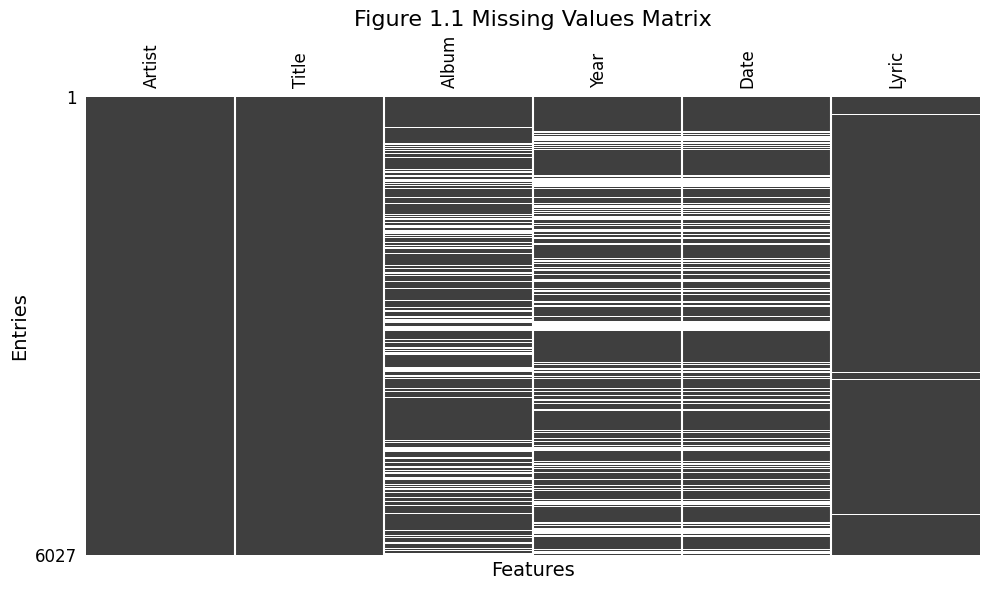

In [ ]:
plt.figure(figsize=(10, 8))
msno.matrix(df_cleaned, figsize=(10, 6), fontsize=12, sparkline=False, labels=True)

plt.title('Figure 1.1 Missing Values Matrix', fontsize=16)
plt.xticks(rotation=90, ha='right')
plt.yticks(fontsize=12)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Entries', fontsize=14)
plt.tight_layout()
plt.show()

#Coded by Madhumitha

Inorder to understand of the null values are at random or were they missing with a certain pattern, we plotted the frequency matrix of the null values in the data frame. From the Figure 1.1 we can note that the null values are at random.

In [ ]:
unique_artist =df_cleaned['Artist'].unique()
unique_artist

num_unique = len(unique_artist)
print("Number of Unique Artists:",num_unique)

#Coded by Madhumitha

Number of Unique Artists: 21


The unique artist names are being extracted by the code from the DataFrame df_cleaned's 'Artist' column.

In [ ]:
df_null = df_cleaned[['Artist','Album','Year', 'Date', 'Lyric']]

tot_artist = df_cleaned['Artist'].value_counts()
null_year_percentage = (df_null[df_null['Year'].isna()].groupby('Artist').size() * 100 / tot_artist).rename('Artist_Year%')
null_date_percentage = (df_null[df_null['Date'].isna()].groupby('Artist').size() * 100 / tot_artist).rename('Artist_Date%')
null_album_percentage = (df_null[df_null['Album'].isna()].groupby('Artist').size() * 100 / tot_artist).rename('Artist_Album%')
null_lyric_percentage = (df_null[df_null['Lyric'].isna()].groupby('Artist').size() * 100 / tot_artist).rename('Artist_Lyric%')

df_null = pd.concat([null_year_percentage, null_date_percentage, null_album_percentage, null_lyric_percentage], axis=1)
df_null.reset_index(inplace=True)
df_null

#Coded by Himani

,index,Artist_Year%,Artist_Date%,Artist_Album%,Artist_Lyric%
0,Ariana Grande,NaN,NaN,30.194805,NaN
1,BTS (방탄소년단),1.798561,1.798561,7.913669,2.877698
2,Beyoncé,33.251232,33.251232,23.645320,NaN
3,Billie Eilish,17.931034,17.931034,43.448276,NaN
4,Cardi B,22.666667,22.666667,41.333333,NaN
5,Charlie Puth,22.666667,22.666667,36.000000,NaN
6,Coldplay,29.651163,29.651163,23.255814,3.197674
7,Drake,29.184549,29.184549,32.618026,0.429185
8,Dua Lipa,27.935223,27.935223,35.222672,0.404858
9,Ed Sheeran,35.135135,35.135135,40.202703,0.675676


The above table represents the corresponding percentage values of **Year**, **Date** and **Lyrics** with respect to each Artist.

##1.2 Null Values by Lyrics for Artist

<ipython-input-133-1afdaa592310>:11: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
<ipython-input-133-1afdaa592310>:11: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  plt.tight_layout()
<ipython-input-133-1afdaa592310>:11: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout()
<ipython-input-133-1afdaa592310>:11: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout()
<ipython-input-133-1afdaa592310>:11: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) mi

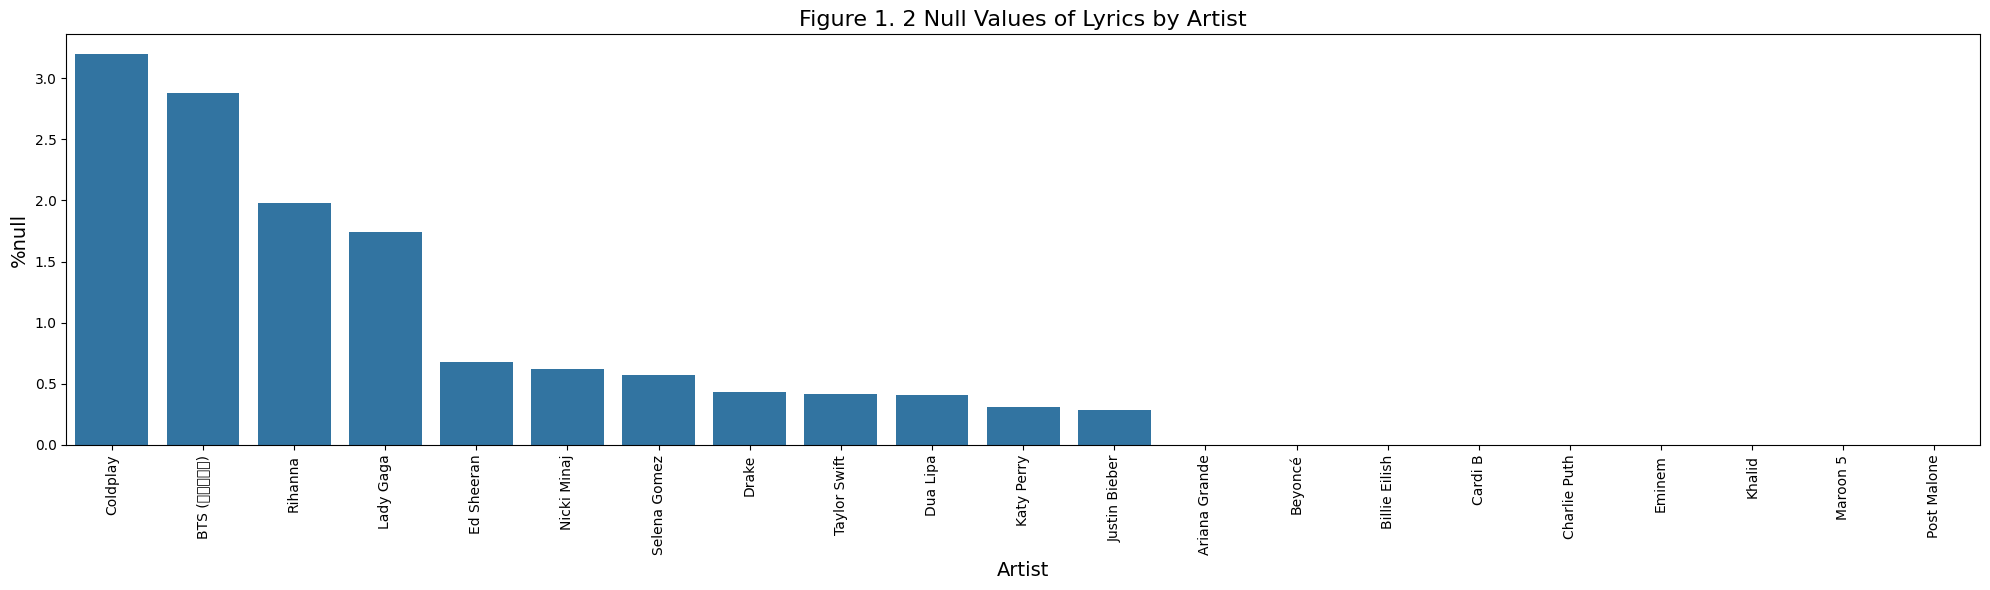

In [ ]:
plt.figure(figsize=(20, 6))

df_null_sort=df_null.sort_values(by='Artist_Lyric%', ascending = False).reset_index()

sns.barplot(x='index', y='Artist_Lyric%', data=df_null_sort)

plt.xlabel('Artist', fontsize=12)
plt.ylabel('%null', fontsize=12)
plt.title('Figure 1. 2 Null Values of Lyrics by Artist', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Coded by Himani

The above Figure 1.2 represents the plot of null values in Lyrics for each artist. We see that Cold Play, followed by BTS and Rihana do not have close to just 3% of the total values.

##1.3 Null Values of Year and Album for Artist

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


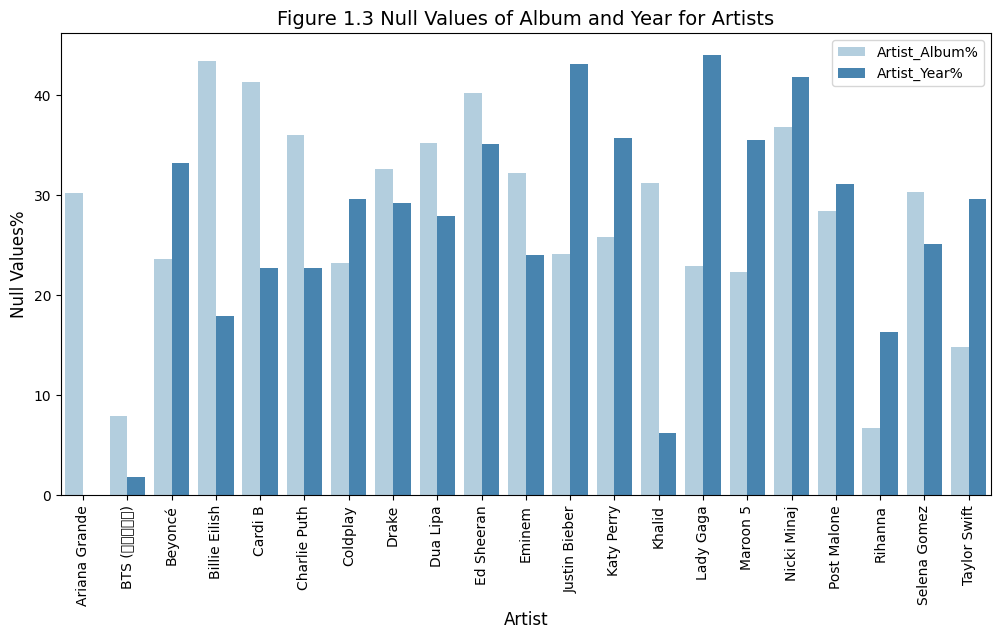

In [ ]:
pivot_table = pd.pivot_table(df_null, index='index', values=['Artist_Year%', 'Artist_Album%'])
pivot_table.reset_index(inplace=True)
df_melt = pivot_table.melt(id_vars='index', var_name='Value', value_name='Null Percentage')

plt.figure(figsize=(12, 6))
sns.barplot(x='index', y='Null Percentage', hue='Value', data=df_melt, palette='Blues')

plt.xlabel('Artist', fontsize=12)
plt.ylabel('Null Values%', fontsize=12)
plt.title('Figure 1.3 Null Values of Album and Year for Artists', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title=None)
plt.show()

#Coded by Madhumitha


Figure 1.3 is an extensive plot of the null values present in each **Year** and **Album** for each artist. We can observe that Lady Gaga and Justin Bieber have considerably high values of null values in **Year**.

While Beyonce and Cardi B have highest null values in **Album**

In [ ]:
df_melt
#Coded by Madhumitha

,index,Value,Null Percentage
0,Ariana Grande,Artist_Album%,30.194805
1,BTS (방탄소년단),Artist_Album%,7.913669
2,Beyoncé,Artist_Album%,23.645320
3,Billie Eilish,Artist_Album%,43.448276
4,Cardi B,Artist_Album%,41.333333
5,Charlie Puth,Artist_Album%,36.000000
6,Coldplay,Artist_Album%,23.255814
7,Drake,Artist_Album%,32.618026
8,Dua Lipa,Artist_Album%,35.222672
9,Ed Sheeran,Artist_Album%,40.202703


Since there a lot of null values in Album, Year and Date it is better to drop these columns.

Since rows with null lyrics are less than 4%, can drop these rows

In [ ]:
df_cleaned=df_cleaned.drop(columns=['Album','Year','Date'], axis=1)
df_cleaned=df_cleaned.dropna()

cleaned_summary = {
    'Initial Rows': df.shape[0],
    'Final Rows': df_cleaned.shape[0],
    'Rows Removed': df.shape[0] - df_cleaned.shape[0]
}

print(cleaned_summary)

#Coded by Madhumitha

{'Initial Rows': 6027, 'Final Rows': 5981, 'Rows Removed': 46}


In [ ]:
duplicate_rows = df_cleaned[df_cleaned.duplicated()]
print("Duplicate rows:")
duplicate_rows

#Coded by Himani

Duplicate rows:


,Artist,Title,Lyric


From this we see that we dont have any duplicate rows which need to processed.

#2. Exploratory Data Analysis

In [ ]:
df_punkt=df_cleaned.copy()
df_punkt['punctuation_count'] = df_punkt['Lyric'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))
df_punkt

#Coded by Shailoz

,Artist,Title,Lyric,Punctuation_Count,Lyrics_len,Tokenized_Lyric,Tokenized_Lyric_String,Tokenized_Sent_Lyric,Num_Sentences,punctuation_count
0,BTS (방탄소년단),Dynamite,jungkook 'cause i i i'm in the stars tonight s...,39,499,"[jungkook, 'cause, i'm, stars, tonight, watch,...",jungkook 'cause i'm stars tonight watch bring ...,[jungkook 'cause i i i'm in the stars tonight ...,1,39
1,BTS (방탄소년단),FAKE LOVE,방탄소년단의 fake love 가사 v jungkook 널 위해서라면 난 슬퍼도...,25,440,"[방탄소년단의, fake, love, 가사, v, jungkook, 널, 위해서라면...",방탄소년단의 fake love 가사 v jungkook 널 위해서라면 난 슬퍼도 기...,[방탄소년단의 fake love 가사 v jungkook 널 위해서라면 난 슬퍼...,1,25
2,BTS (방탄소년단),MIC Drop (Steve Aoki Remix),mic drop steve aoki remix 의해 방탄소년단 가사 jhope ...,40,526,"[mic, drop, steve, aoki, remix, 의해, 방탄소년단, 가사,...",mic drop steve aoki remix 의해 방탄소년단 가사 jhope ye...,[mic drop steve aoki remix 의해 방탄소년단 가사 jhope...,1,40
3,BTS (방탄소년단),전하지 못한 진심 (The Truth Untold),방탄소년단의 전하지 못한 진심 가사 v 외로움이 가득히 피어있는 이 garden...,2,226,"[방탄소년단의, 전하지, 못한, 진심, 가사, v, 외로움이, 가득히, 피어있는, ...",방탄소년단의 전하지 못한 진심 가사 v 외로움이 가득히 피어있는 이 garden 가...,[방탄소년단의 전하지 못한 진심 가사 v 외로움이 가득히 피어있는 이 garde...,1,2
4,BTS (방탄소년단),봄날 (Spring Day),rm 보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 ...,1,327,"[rm, 보고, 싶다, 이렇게, 말하니까, 더, 보고, 싶다, 너희, 사진을, 보고...",rm 보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 ...,[rm 보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다...,1,1
...,...,...,...,...,...,...,...,...,...,...
6022,Post Malone,Lithium,i'm so happy 'cause today i found my friends t...,47,296,"[i'm, happy, 'cause, today, friends, they're, ...",i'm happy 'cause today friends they're head i'...,[i'm so happy 'cause today i found my friends ...,1,47
6023,Post Malone,Something in the Way,verse underneath the tarp has sprung a leak a...,10,159,"[verse, underneath, tarp, sprung, leak, animal...",verse underneath tarp sprung leak animals i've...,[verse underneath the tarp has sprung a leak ...,1,10
6024,Post Malone,In Bloom,sell the kids for food weather changes moods s...,6,266,"[sell, kids, food, weather, changes, moods, sp...",sell kids food weather changes moods spring re...,[sell the kids for food weather changes moods ...,1,6
6025,Post Malone,Territorial Pissings,when i was an alien cultures weren't opinions ...,18,165,"[alien, cultures, weren't, opinions, gotta, wa...",alien cultures weren't opinions gotta way way ...,[when i was an alien cultures weren't opinions...,1,18


We are deriving the punctuations used by each artist in each song to understand. This could serve as a starting point to understanding the rhythm and song structure.

##2.1 Length of lyrics

In [ ]:
df_cleaned['Lyrics_len']=df_cleaned['Lyric'].apply(lambda x: len(str(x).split()))

#Coded by Madhumitha

In [ ]:
df_len=df_cleaned.copy()
df_len= df_len.groupby('Artist')['Lyrics_len'].mean().reset_index()
df_len['Lyrics_len'] = df_len['Lyrics_len'].round(0)
df_len.head(5)

#Coded by Madhumitha

,Artist,Lyrics_len
0,Ariana Grande,322.0
1,BTS (방탄소년단),504.0
2,Beyoncé,411.0
3,Billie Eilish,200.0
4,Cardi B,425.0


In [ ]:
df_len
#Coded by Madhumitha

,Artist,Lyrics_len
0,Ariana Grande,322.0
1,BTS (방탄소년단),504.0
2,Beyoncé,411.0
3,Billie Eilish,200.0
4,Cardi B,425.0
5,Charlie Puth,317.0
6,Coldplay,189.0
7,Drake,470.0
8,Dua Lipa,311.0
9,Ed Sheeran,378.0


<ipython-input-142-8656c47e49c8>:13: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
<ipython-input-142-8656c47e49c8>:13: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  plt.tight_layout()
<ipython-input-142-8656c47e49c8>:13: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout()
<ipython-input-142-8656c47e49c8>:13: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout()
<ipython-input-142-8656c47e49c8>:13: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) mi

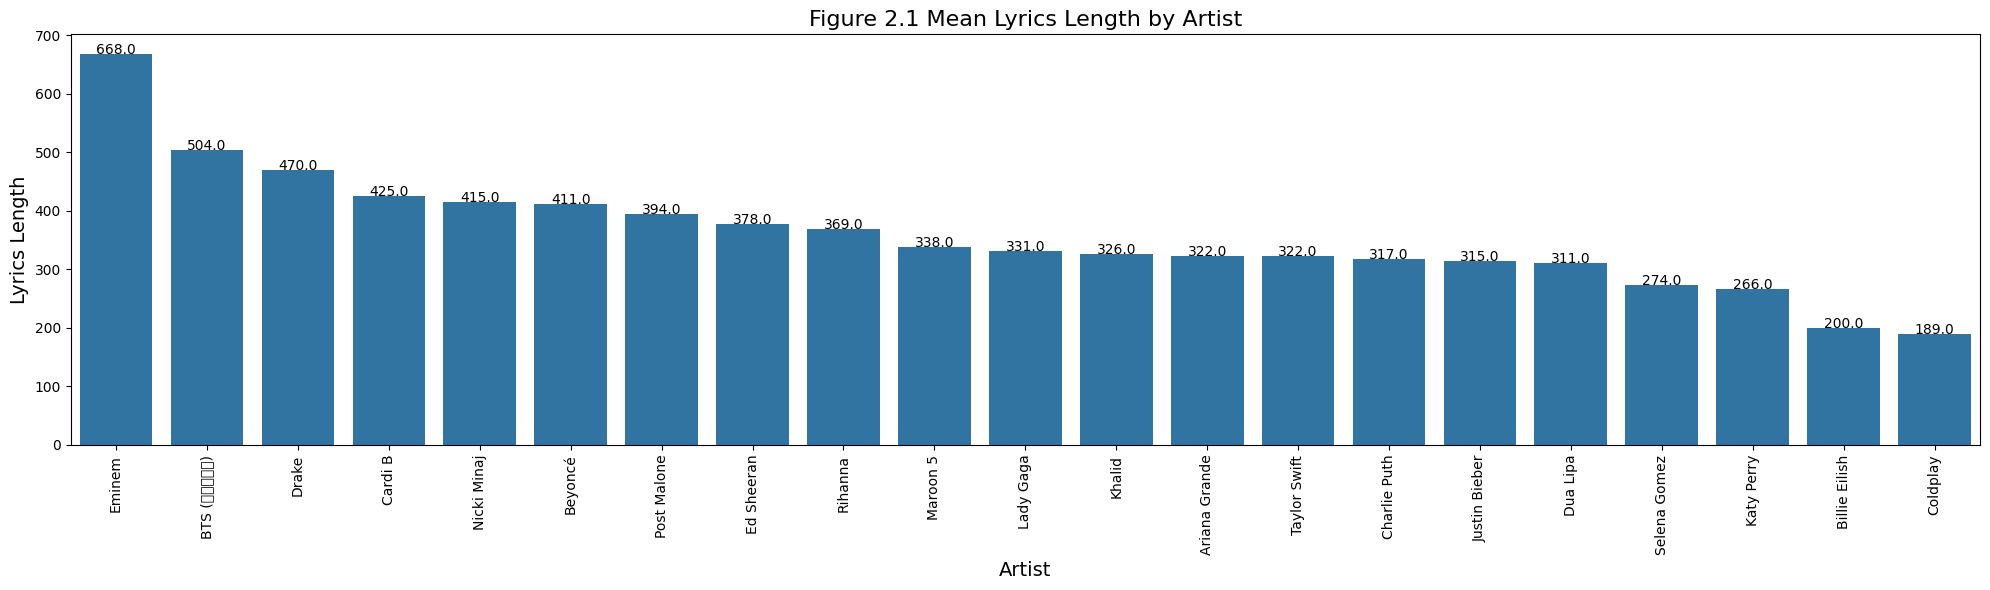

In [ ]:
df_len=df_len.sort_values(by='Lyrics_len', ascending=False).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='Artist', y='Lyrics_len', data=df_len)

for index, row in df_len.iterrows():
    plt.text(index, row['Lyrics_len'], row['Lyrics_len'], color='black', ha="center")

plt.xlabel('Artist', fontsize=14)
plt.ylabel('Lyrics Length', fontsize=14)
plt.title('Figure 2.1 Average Lyrics Length by Artist', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Coded by Madhumitha


Figure 2.1 is a plot of average lyrics length for each artist. It is interesting to note that Eminem tops having a distinct difference with the next artist, BTS. This disparity may be attributed to Eminem's style as a rapper, where lyrics tend to contain a higher number of words despite maintaining a typical song length.

[Eminem Vocabulary](https://www.detroitnews.com/story/entertainment/music/2015/07/23/study-eminem-largest-vocabulary-music/30574233/) The link also cross verifies how Eminem has the highest number of vocabulary

##2.2 Unique Words Percentage by each Artist

In [ ]:
unqiue_words_artist = {}
tot_words_artist={}
df_grp = df_cleaned.groupby('Artist')

for artist, df_grp in df_grp:
    lyrics_all = ' '.join(df_grp['Lyric'].astype(str))
    words = lyrics_all.lower().split()
    tot_words = len(words)
    tot_words_artist[artist] = tot_words
    unique_words = set(words)
    unqiue_words_artist[artist] = unique_words

    #Coded by Shailoz

In [ ]:
df_unique_words = {
    'Artist': [artist for artist in unqiue_words_artist.keys()],
    'Unique_Words': [len(unique_words) for unique_words in unqiue_words_artist.values()],
    'Total_Words': [tot_words_artist[artist] for artist in tot_words_artist.keys()]
}
df_unique_words = pd.DataFrame(df_unique_words)
df_unique_words

#Coded by Shailoz

,Artist,Unique_Words,Total_Words
0,Ariana Grande,4306,99120
1,BTS (방탄소년단),21158,136138
2,Beyoncé,6647,166744
3,Billie Eilish,1915,28951
4,Cardi B,3319,31855
5,Charlie Puth,1643,23761
6,Coldplay,3520,62871
7,Drake,11679,218011
8,Dua Lipa,2792,76611
9,Ed Sheeran,5765,111086


In [ ]:
df_unique_words['Percentage_words']=df_unique_words['Unique_Words']*100/df_unique_words['Total_Words']
df_unique_words['Percentage_words']=df_unique_words['Percentage_words'].round(2)

<ipython-input-146-602968b23330>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Artist', y='Percentage_words', data=df_unique_words, palette='Blues')
<ipython-input-146-602968b23330>:12: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  plt.tight_layout()
<ipython-input-146-602968b23330>:12: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  plt.tight_layout()
<ipython-input-146-602968b23330>:12: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  plt.tight_layout()
<ipython-input-146-602968b23330>:12: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout()
<ipython-input-146-602968b23330>:12: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  plt.tight_layout()
/usr/local/l

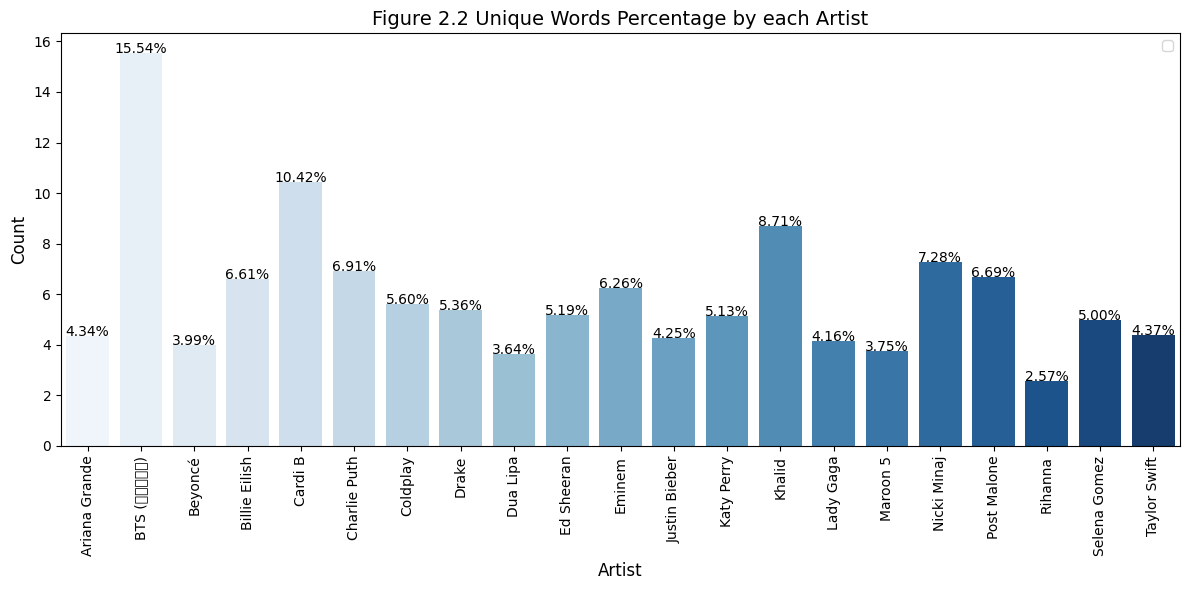

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Artist', y='Percentage_words', data=df_unique_words, palette='Blues')

for index, row in df_unique_words.iterrows():
    plt.text(index, row['Percentage_words'], f"{row['Percentage_words']:.2f}%", color='black', ha='center')

plt.xlabel('Artist', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Figure 2.2 Unique Words Percentage by each Artist', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title=None)
plt.tight_layout()
plt.show()

#Coded by Shailoz

As we proceed with the text analysis, it is interesting to note how different artist have a very unique style. Major part of the word usage can be captured from Figure 2.2 which gives a complete picture on what percent of the entire lyrics are actually unique words.
BTS tops with 15% unqiue words with Rihana being the least. This makes sense, as sometimes the songs has a major chunk covered with music and chorus.
[Chorus importance](https://www.secretsofsongwriting.com/2016/04/18/why-a-good-chorus-usually-surpasses-a-good-verse-in-importance/)This link talks extensively about how chorus surpasses a verses in importance. This also attributes why most of the artist have very few unqiue words and focus on music and chorus.

##2.3 Word Tokenization

In [ ]:
!pip install nltk
#Coded by Prudhvi

In [ ]:
nltk.download('punkt')
#Coded by Prudhvi

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df_cleaned['Lyric'] = df_cleaned['Lyric'].astype(str)
df_cleaned['Tokenized_Lyric'] = df_cleaned['Lyric'].apply(lambda x: word_tokenize(x))
df_cleaned[['Lyric', 'Tokenized_Lyric']]

#Coded by Prudhvi

,Lyric,Tokenized_Lyric
0,jungkook 'cause i i i'm in the stars tonight s...,"[jungkook, 'cause, i, i, i, 'm, in, the, stars..."
1,방탄소년단의 fake love 가사 v jungkook 널 위해서라면 난 슬퍼도...,"[방탄소년단의, fake, love, 가사, v, jungkook, 널, 위해서라면..."
2,mic drop steve aoki remix 의해 방탄소년단 가사 jhope ...,"[mic, drop, steve, aoki, remix, 의해, 방탄소년단, 가사,..."
3,방탄소년단의 전하지 못한 진심 가사 v 외로움이 가득히 피어있는 이 garden...,"[방탄소년단의, 전하지, 못한, 진심, 가사, v, 외로움이, 가득히, 피어있는, ..."
4,rm 보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 ...,"[rm, 보고, 싶다, 이렇게, 말하니까, 더, 보고, 싶다, 너희, 사진을, 보고..."
...,...,...
6022,i'm so happy 'cause today i found my friends t...,"[i, 'm, so, happy, 'cause, today, i, found, my..."
6023,verse underneath the tarp has sprung a leak a...,"[verse, underneath, the, tarp, has, sprung, a,..."
6024,sell the kids for food weather changes moods s...,"[sell, the, kids, for, food, weather, changes,..."
6025,when i was an alien cultures weren't opinions ...,"[when, i, was, an, alien, cultures, were, n't,..."


In [ ]:
df_cleaned['Tokenized_Lyric_String'] = df_cleaned['Tokenized_Lyric'].apply(lambda x: ' '.join(x))
vectorizer = CountVectorizer()
#Coded by Prudhvi

In [ ]:
X = vectorizer.fit_transform(df_cleaned['Tokenized_Lyric_String'])
df_vectorizer = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
#Coded by Prudhvi

In [ ]:
df_vectorizer.head(3)
#Coded by Prudhvi

,00,000,0000,00000,0000000,000s,000the,004,004mosh,005,...,힙찌질이,힙찌질일,힙찔,힙합,힙합계의,힙합성애자,힙합으로,힙합은,힙합이,힛잇을
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


All the above processing aims to tokenize and vectorize the words present in the lyrcis of the data set. We see that we have more than 55k columns which are generated.

###2.3.1 Stop Words

In [ ]:
df_cleaned['Tokenized_Lyric'] = df_cleaned['Lyric'].apply(lambda x: x.lower().split())

stop_words = set(ENGLISH_STOP_WORDS)
df_cleaned['Tokenized_Lyric'] = df_cleaned['Tokenized_Lyric'].apply(lambda x: [word for word in x if word not in stop_words])

#Coded by Himani

In [ ]:
df_cleaned['Tokenized_Lyric_String'] = df_cleaned['Tokenized_Lyric'].apply(lambda x: ' '.join(x))
vectorizer_stop = CountVectorizer(stop_words='english')

X = vectorizer_stop.fit_transform(df_cleaned['Tokenized_Lyric_String'])
vectorized_df_cleaned = pd.DataFrame(X.toarray(), columns=vectorizer_stop.get_feature_names_out())

#Coded by Himani

In [ ]:
print("The number of stop words removed:", (df_vectorizer.shape[1]-vectorized_df_cleaned.shape[1]))

#Coded by Himani

The number of stop words removed: 281


Though we have 55K words, we also are aware that there could be stop words. So we set to remove the stop words to enhance our text processing better. We see that we have close to 300 stop words present in the data set which were removed.

##2.4 Sentence Tokenization

In [ ]:
df_cleaned['Tokenized_Sent_Lyric'] = df_cleaned['Lyric'].apply(lambda x: sent_tokenize(x))
df_cleaned
#Coded by Prudhvi

,Artist,Title,Lyric,Punctuation_Count,Lyrics_len,Tokenized_Lyric,Tokenized_Lyric_String,Tokenized_Sent_Lyric
0,BTS (방탄소년단),Dynamite,jungkook 'cause i i i'm in the stars tonight s...,39,499,"[jungkook, 'cause, i'm, stars, tonight, watch,...",jungkook 'cause i'm stars tonight watch bring ...,[jungkook 'cause i i i'm in the stars tonight ...
1,BTS (방탄소년단),FAKE LOVE,방탄소년단의 fake love 가사 v jungkook 널 위해서라면 난 슬퍼도...,25,440,"[방탄소년단의, fake, love, 가사, v, jungkook, 널, 위해서라면...",방탄소년단의 fake love 가사 v jungkook 널 위해서라면 난 슬퍼도 기...,[방탄소년단의 fake love 가사 v jungkook 널 위해서라면 난 슬퍼...
2,BTS (방탄소년단),MIC Drop (Steve Aoki Remix),mic drop steve aoki remix 의해 방탄소년단 가사 jhope ...,40,526,"[mic, drop, steve, aoki, remix, 의해, 방탄소년단, 가사,...",mic drop steve aoki remix 의해 방탄소년단 가사 jhope ye...,[mic drop steve aoki remix 의해 방탄소년단 가사 jhope...
3,BTS (방탄소년단),전하지 못한 진심 (The Truth Untold),방탄소년단의 전하지 못한 진심 가사 v 외로움이 가득히 피어있는 이 garden...,2,226,"[방탄소년단의, 전하지, 못한, 진심, 가사, v, 외로움이, 가득히, 피어있는, ...",방탄소년단의 전하지 못한 진심 가사 v 외로움이 가득히 피어있는 이 garden 가...,[방탄소년단의 전하지 못한 진심 가사 v 외로움이 가득히 피어있는 이 garde...
4,BTS (방탄소년단),봄날 (Spring Day),rm 보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 ...,1,327,"[rm, 보고, 싶다, 이렇게, 말하니까, 더, 보고, 싶다, 너희, 사진을, 보고...",rm 보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다 ...,[rm 보고 싶다 이렇게 말하니까 더 보고 싶다 너희 사진을 보고 있어도 보고 싶다...
...,...,...,...,...,...,...,...,...
6022,Post Malone,Lithium,i'm so happy 'cause today i found my friends t...,47,296,"[i'm, happy, 'cause, today, friends, they're, ...",i'm happy 'cause today friends they're head i'...,[i'm so happy 'cause today i found my friends ...
6023,Post Malone,Something in the Way,verse underneath the tarp has sprung a leak a...,10,159,"[verse, underneath, tarp, sprung, leak, animal...",verse underneath tarp sprung leak animals i've...,[verse underneath the tarp has sprung a leak ...
6024,Post Malone,In Bloom,sell the kids for food weather changes moods s...,6,266,"[sell, kids, food, weather, changes, moods, sp...",sell kids food weather changes moods spring re...,[sell the kids for food weather changes moods ...
6025,Post Malone,Territorial Pissings,when i was an alien cultures weren't opinions ...,18,165,"[alien, cultures, weren't, opinions, gotta, wa...",alien cultures weren't opinions gotta way way ...,[when i was an alien cultures weren't opinions...


In [ ]:
df_cleaned['Num_Sentences'] = df_cleaned['Tokenized_Sent_Lyric'].apply(len)
art_sent_cnt = df_cleaned.groupby('Artist')['Num_Sentences'].sum().reset_index()

art_sent_cnt
#Coded by Prudhvi

,Artist,Num_Sentences
0,Ariana Grande,308
1,BTS (방탄소년단),270
2,Beyoncé,406
3,Billie Eilish,145
4,Cardi B,75
5,Charlie Puth,75
6,Coldplay,333
7,Drake,464
8,Dua Lipa,246
9,Ed Sheeran,294


In [ ]:
art_word_cnt = df_cleaned.groupby('Artist')['Lyrics_len'].sum().reset_index()
art_sent_word_cnt = pd.merge(art_sent_cnt, art_word_cnt, on='Artist')
art_sent_word_cnt['Avg_Words_Per_Sentence'] = art_sent_word_cnt['Lyrics_len'] / art_sent_word_cnt['Num_Sentences']
#Coded by Prudhvi

<ipython-input-211-cfc695193ab9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Artist', y='Avg_Words_Per_Sentence', data=art_sent_word_cnt, palette='Blues', label='Artist')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 453

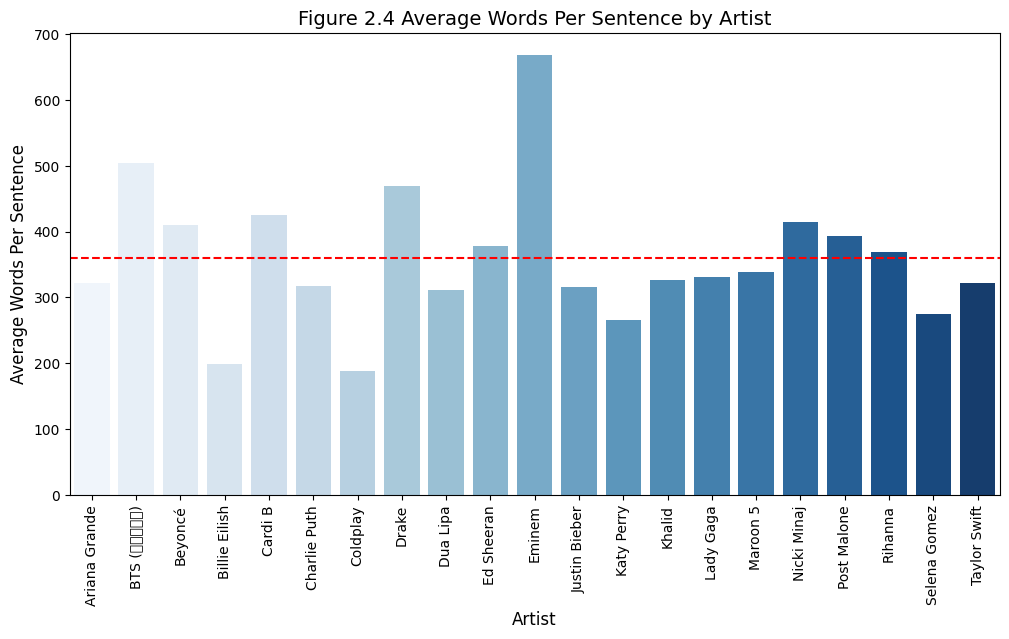

In [ ]:
avg_all = art_sent_word_cnt['Avg_Words_Per_Sentence'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x='Artist', y='Avg_Words_Per_Sentence', data=art_sent_word_cnt, palette='Blues', label='Artist')
plt.axhline(avg_all, color='red', linestyle='--', label='Overall Average')
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Average Words Per Sentence', fontsize=12)
plt.title('Figure 2.4 Average Words Per Sentence by Artist', fontsize=14)
plt.xticks(rotation=90)
plt.show()
#Coded by Prudhvi

Further going from Word Tokenization to Sentence Tokenization, we derived the average number of lyrics per sentence for each artist. Figure 2.4, it is almost an even distribution between the artist where half of them have above average and rest below average.

##2.5 Most Popular Words by Artist

In [ ]:
vectorized_df_cleaned['Artist'] = df_cleaned['Artist']

artist_word_counts = vectorized_df_cleaned.groupby('Artist').sum()

most_popular_words_by_artist = {}
for artist, word_counts in artist_word_counts.iterrows():
    most_popular_words = word_counts.sort_values(ascending=False).index[:5]
    most_popular_words_by_artist[artist] = most_popular_words.tolist()

most_popular_words_by_artist
#Coded by Prudhvi

{'Ariana Grande': ['yeah', 'love', 'baby', 'know', 'got'],
 'BTS (방탄소년단)': ['jungkook', 'yeah', 'jimin', 'oh', 'love'],
 'Beyoncé': ['oh', 'love', 'like', 'let', 'baby'],
 'Billie Eilish': ['don', 'like', 'know', 'love', 'eyes'],
 'Cardi B': ['like', 'don', 'bitch', 'got', 'oh'],
 'Charlie Puth': ['love', 'don', 'yeah', 'know', 'just'],
 'Coldplay': ['oh', 'don', 'just', 'know', 'love'],
 'Drake': ['like', 'know', 'just', 'yeah', 'don'],
 'Dua Lipa': ['don', 'know', 'got', 'like', 'love'],
 'Ed Sheeran': ['love', 'like', 'don', 'know', 'just'],
 'Eminem': ['like', 'just', 'don', 'cause', 'got'],
 'Justin Bieber': ['yeah', 'oh', 'love', 'don', 'girl'],
 'Katy Perry': ['like', 'don', 'oh', 'yeah', 'just'],
 'Khalid': ['yeah', 'ooh', 'know', 'like', 'don'],
 'Lady Gaga': ['want', 'love', 'don', 'oh', 'baby'],
 'Maroon 5': ['yeah', 'don', 'know', 'love', 'like'],
 'Nicki Minaj': ['like', 'know', 'nicki', 'got', 'don'],
 'Post Malone': ['yeah', 'don', 'know', 'like', 'got'],
 'Rihanna': ['l

In [ ]:
df_output = pd.DataFrame.from_dict(most_popular_words_by_artist, orient='index', columns=['Word 1', 'Word 2', 'Word 3', 'Word 4', 'Word 5'])
print(df_output)
#Coded by Prudhvi

                 Word 1 Word 2 Word 3 Word 4 Word 5
Ariana Grande      yeah   love   baby   know    got
BTS (방탄소년단)    jungkook   yeah  jimin     oh   love
Beyoncé              oh   love   like    let   baby
Billie Eilish       don   like   know   love   eyes
Cardi B            like    don  bitch    got     oh
Charlie Puth       love    don   yeah   know   just
Coldplay             oh    don   just   know   love
Drake              like   know   just   yeah    don
Dua Lipa            don   know    got   like   love
Ed Sheeran         love   like    don   know   just
Eminem             like   just    don  cause    got
Justin Bieber      yeah     oh   love    don   girl
Katy Perry         like    don     oh   yeah   just
Khalid             yeah    ooh   know   like    don
Lady Gaga          want   love    don     oh   baby
Maroon 5           yeah    don   know   love   like
Nicki Minaj        like   know  nicki    got    don
Post Malone        yeah    don   know   like    got
Rihanna     

Being hard core fans of these artists, we could totally relate to how these were the most popular words used by the artists.
This table aims to get insight into the most popular words by each artist. It is interesting to note that the words are almost similar to all the artist.

In [ ]:
vectorized_df_cleaned['Artist'] = df_cleaned['Artist']

artist_word_counts = vectorized_df_cleaned.groupby('Artist').sum()

most_popular_words_by_artist_100 = {}
for artist, word_counts in artist_word_counts.iterrows():
    most_popular_words = word_counts.sort_values(ascending=False).index[:100]
    most_popular_words_by_artist_100[artist] = most_popular_words.tolist()

most_popular_words_by_artist_100

df_output_100 = pd.DataFrame.from_dict(most_popular_words_by_artist_100, orient='index')
df_output_100
#Coded by Prudhvi

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Ariana Grande,yeah,love,baby,know,got,don,oh,like,just,let,...,crazy,stole,thing,em,forget,change,going,new,true,woman
BTS (방탄소년단),jungkook,yeah,jimin,oh,love,la,know,let,rm,like,...,dynnanana,hook,stars,그래,stay,hands,fake,bts,everybody,monster
Beyoncé,oh,love,like,let,baby,don,know,got,beyoncé,cause,...,ring,feelin,gettin,party,best,things,hook,dance,better,day
Billie Eilish,don,like,know,love,eyes,ocean,say,yeah,oh,make,...,sad,feet,hide,ya,gutter,ooh,home,pretty,giving,care
Cardi B,like,don,bitch,got,oh,know,just,cardi,money,yeah,...,gang,buy,smile,bardi,dat,cheap,god,tú,dance,gimme
Charlie Puth,love,don,yeah,know,just,like,oh,baby,ooh,pre,...,bit,kill,ahead,hurt,hands,stay,really,trying,ma,knows
Coldplay,oh,don,just,know,love,ll,like,yeah,come,feel,...,hurt,hook,leave,thing,boy,true,break,little,ohohoh,future
Drake,like,know,just,yeah,don,got,drake,shit,love,girl,...,gone,turn,started,hope,game,goin,run,sure,ready,stop
Dua Lipa,don,know,got,like,love,let,cause,baby,come,ve,...,body,pretty,stay,real,hands,home,crazy,mimimimind,sleep,late
Ed Sheeran,love,like,don,know,just,need,oh,ll,come,baby,...,water,face,boy,burning,angels,gotta,red,ya,knows,words


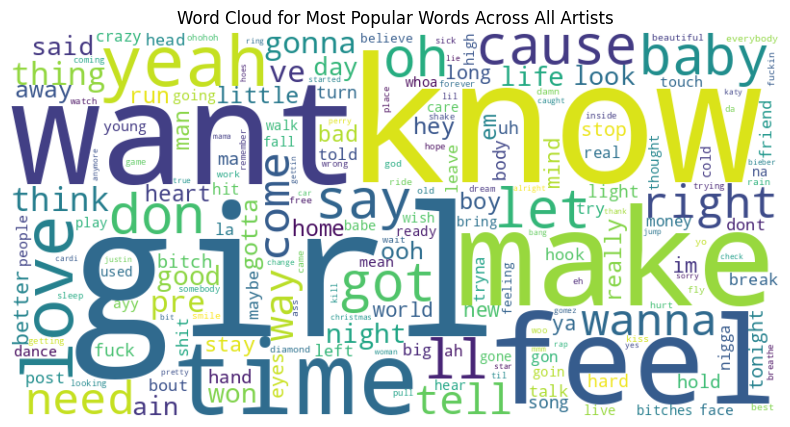

In [ ]:
all_words = ' '.join([' '.join(words) for words in most_popular_words_by_artist_100.values()])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Most Popular Words Across All Artists')
plt.show()

#Coded by Shailoz

Replicating the same to get a word cloud on the top 100 words used by all the artist. We can see the words like girl, want, know, feel are used by most of the artist almost all the time.

##2.6 Dimensionality Reduction

In [ ]:
pca = PCA(n_components=160)
df_vect_pca=pca.fit_transform(df_vectorizer)

df_components = pd.DataFrame(df_vect_pca)

#Coded by Prudhvi

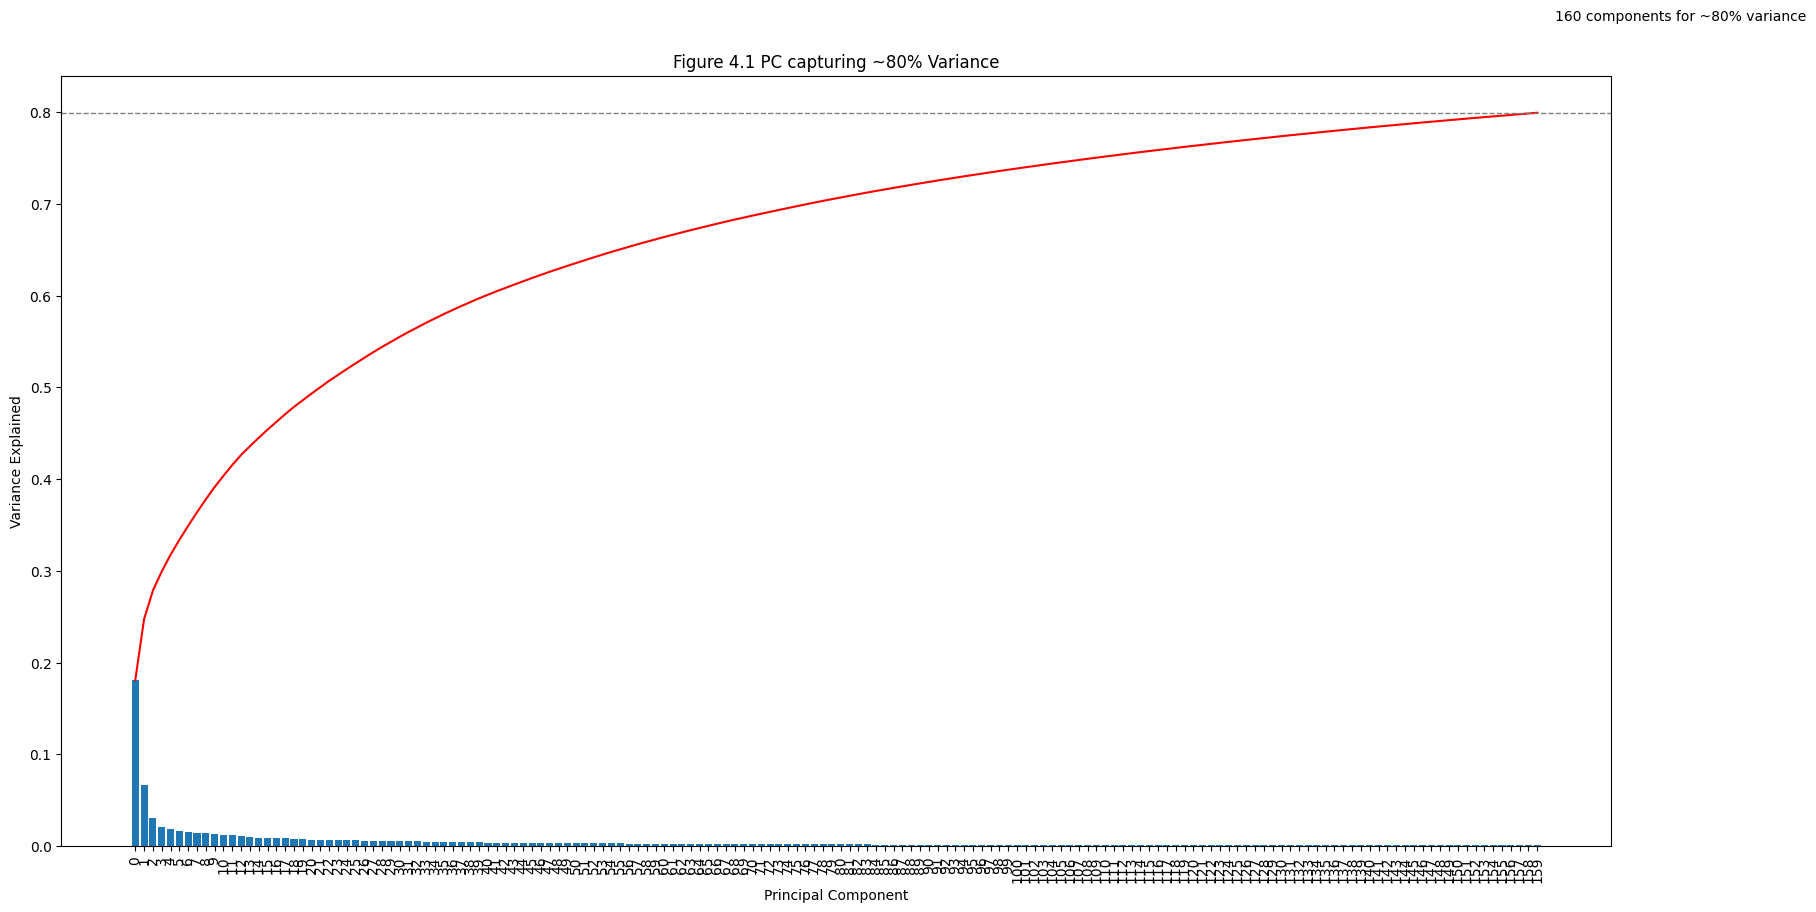

In [ ]:
component_ids = range(pca.n_components_)
cum_var = np.cumsum(pca.explained_variance_ratio_)
required_components = np.argmax(cum_var >= 0.799)+1

plt.figure(figsize=(20,10))
plt.bar(component_ids, pca.explained_variance_ratio_)
plt.plot(component_ids, cum_var, color='red')
plt.axhline(y=0.799, color='gray', linestyle='--', linewidth=1)
plt.xticks(component_ids, rotation=90)
plt.ylabel('Variance Explained')
plt.xlabel('Principal Component')
plt.title('Figure 4.1 PC capturing ~80% Variance')
plt.annotate(f'{required_components} components for ~80% variance', xy=(required_components, 0.799), xytext=(required_components+1, 0.9))
plt.show()

#Coded by Prudhvi


After tokenization, we decided to do dimensionality reduction to capture at least 80% of the variance. This was done to further the cluster data and derive insights.
It is not surprising to almost 80% of the variance in contained in just 160 components which is less than 1% (0.29%) of the features.

##2.7 Clustering

In [ ]:
kmeans_res=KMeans(3,init='random').fit(df_components)
#Coded by Madhumitha

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_components['labels']=kmeans_res.labels_
df_components['labels'].value_counts()
#Coded by Madhumitha

1    4023
0    1946
2      12
Name: labels, dtype: int64

Using PCA we do clustering with 3 clusters using KMeans. Further we would build upon this to analyse sentiments, emotions, etc.

# Preliminary Results

1. **Tokenization and Stop Words Removal:** Commencing the analysis, we strategically tokenized both words and sentences within the lyrics, laying the groundwork for a more granular examination of the textual content. To enhance the quality of our analysis, stop words were judiciously eliminated using the 'nltk' library and the 'ENGLISH_STOP_WORDS' set in Python.

2. **Most Commonly Used Words Analysis**: We **embarked on deciphering the linguistic landscape by identifying the most commonly used words in the lyrics across various artists. Employing the insights gained from tokenization, we generated a visually informative word cloud, offering a snapshot of the prevalent words that characterize the lyrical expressions of each artist.

3. **Dimensionality Reduction with PCA:** A significant challenge surfaced during the vectorization process, resulting in an overwhelming 57,000+ features (words). In response, we applied Principal Component Analysis (PCA) to effectively reduce dimensionality while retaining key information. Remarkably, the application of PCA allowed us to condense the feature space to 160 components, capturing an impressive 80% of the variance within the dataset.

4. **Clustering Analysis**: Building upon the reduced feature set derived from PCA, we proceeded to deploy clustering techniques. Opting for a cluster count of 3, we sought to unveil inherent patterns and groupings within the lyrical content. This clustering analysis lays the foundation for categorizing artists based on similarities in their linguistic choices, paving the way for more nuanced insights into the dataset.

## **Interim Observations:**
The preliminary results showcase a successful initial exploration into the intricate linguistic patterns within the lyrics dataset. By addressing challenges related to dimensionality, tokenization, and stop words, we have set the stage for a more focused and insightful analysis. The combination of word cloud visualizations, dimensionality reduction with PCA, and clustering adds depth to our understanding of artists' linguistic inclinations, setting the groundwork for further exploration and interpretation in subsequent stages of the unsupervised machine learning project.

